In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

c:\Users\Jack\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\Jack\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [3]:
aisles = pd.read_csv('aisles.csv')

departments = pd.read_csv('departments.csv')

order_products_prior = pd.read_csv('order_products__prior.csv')

order_products_train = pd.read_csv('order_products__train.csv')

orders = pd.read_csv('orders.csv')

products = pd.read_csv('products.csv')

In [4]:
products = pd.merge(aisles, products, on='aisle_id')
products = pd.merge(departments, products, on='department_id')
products = pd.merge(order_products_train, products, on='product_id')

In [5]:
products_and_orders = pd.merge(products, orders, on='order_id')

In [6]:
#Creating a df for items in each basket
baskets = (products_and_orders.groupby(['order_id']))['product_name'].agg(list).reset_index()
baskets.rename(columns={'product_name':'basket'}, inplace=True)
baskets.drop('order_id', axis=1, inplace=True)
baskets.head()


,basket
0,"[Bulgarian Yogurt, Organic 4% Milk Fat Whole M..."
1,"[Grated Pecorino Romano Cheese, Spring Water, ..."
2,"[Shelled Pistachios, Organic Biologique Limes,..."
3,"[Roasted Turkey, Organic Cucumber, Organic Gra..."
4,"[Bag of Organic Bananas, Organic Raspberries, ..."


In [16]:
#Market basket analysis
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convert the 'basket' column in the 'baskets' DataFrame into a list of lists
baskets_list = baskets['basket'].tolist()
baskets_list_sample = baskets_list[:10000]

# Convert the dataset into a transaction format
te = TransactionEncoder()
te_ary = te.fit(baskets_list_sample).transform(baskets_list_sample)
df = pd.DataFrame(te_ary, columns=te.columns_)

# remove columns when sum of true rows is less than 1
df = df.loc[:, df.sum() > 1]

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)

# Display the association rules
rules.sort_values(by='confidence', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
229,"(Organic Hass Avocado, Organic Strawberries)",(Bag of Organic Bananas),0.0099,0.1194,0.0055,0.555556,4.652894,0.004318,1.981350,0.792930
235,"(Organic Strawberries, Organic Raspberries)",(Bag of Organic Bananas),0.0109,0.1194,0.0050,0.458716,3.841839,0.003699,1.626871,0.747860
67,(Cucumber Kirby),(Banana),0.0185,0.1403,0.0071,0.383784,2.735451,0.004504,1.395127,0.646388
45,(Organic Raspberries),(Bag of Organic Bananas),0.0405,0.1194,0.0148,0.365432,3.060570,0.009964,1.387716,0.701682
1,(Apple Honeycrisp Organic),(Bag of Organic Bananas),0.0178,0.1194,0.0065,0.365169,3.058363,0.004375,1.387140,0.685225
43,(Organic Navel Orange),(Bag of Organic Bananas),0.0148,0.1194,0.0053,0.358108,2.999230,0.003533,1.371882,0.676595
69,(Honeycrisp Apple),(Banana),0.0289,0.1403,0.0101,0.349481,2.490955,0.006045,1.321560,0.616360
39,(Organic Large Extra Fancy Fuji Apple),(Bag of Organic Bananas),0.0240,0.1194,0.0083,0.345833,2.896427,0.005434,1.346140,0.670847
25,(Organic D'Anjou Pears),(Bag of Organic Bananas),0.0161,0.1194,0.0055,0.341615,2.861096,0.003578,1.337515,0.661128
36,(Organic Hass Avocado),(Bag of Organic Bananas),0.0536,0.1194,0.0183,0.341418,2.859446,0.011900,1.337115,0.687111


### antecedents: 
    The item(s) in the antecedent of the rule. This is represented as a frozenset.

### consequents: 
    The item(s) in the consequent of the rule. This is also represented as a frozenset.

### antecedent support: 
    The support of the antecedent in the dataset.

### consequent support: 
    The support of the consequent in the dataset.

### support: 
    The support of the rule in the dataset. This is the proportion of transactions in the dataset that contain all items in both the antecedent and the consequent of the rule.

### confidence: 
    The confidence of the rule. This is the proportion of transactions that contain the antecedent which also contain the consequent.

### lift: 
    The lift of the rule. This is the ratio of the observed support to that expected if the antecedent and the consequent were independent.

### leverage: 
    The leverage of the rule. This is the difference between the observed support and that expected if the antecedent and the consequent were independent.

### conviction: 
    The conviction of the rule. This is a measure of the implication of the rule. A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.

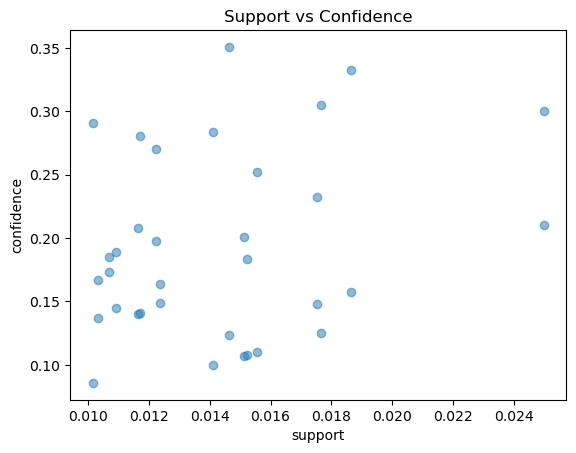

In [76]:
# Visualize the association rules
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

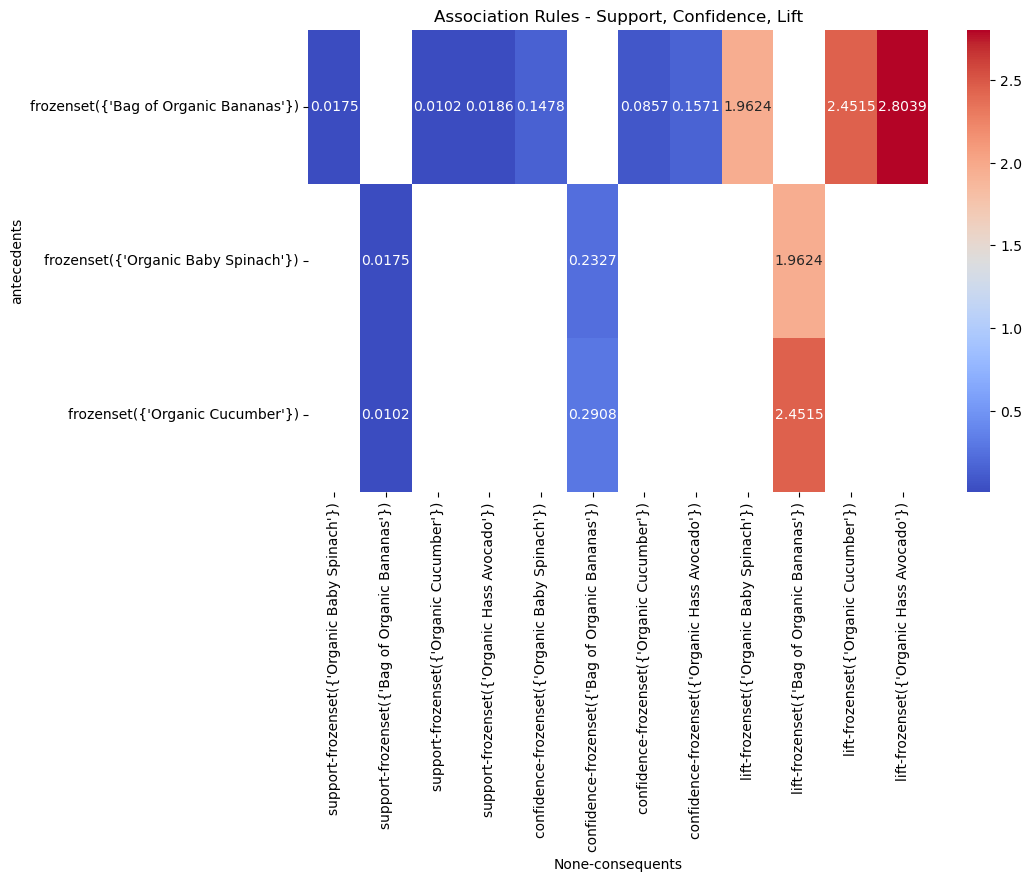

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

rules_heat = rules.head(5)

# Pivot the DataFrame for better visualization
heatmap_data = rules_heat.pivot(index='antecedents', columns='consequents', values=['support', 'confidence', 'lift'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.4f', cmap='coolwarm')
plt.title('Association Rules - Support, Confidence, Lift')
plt.show()

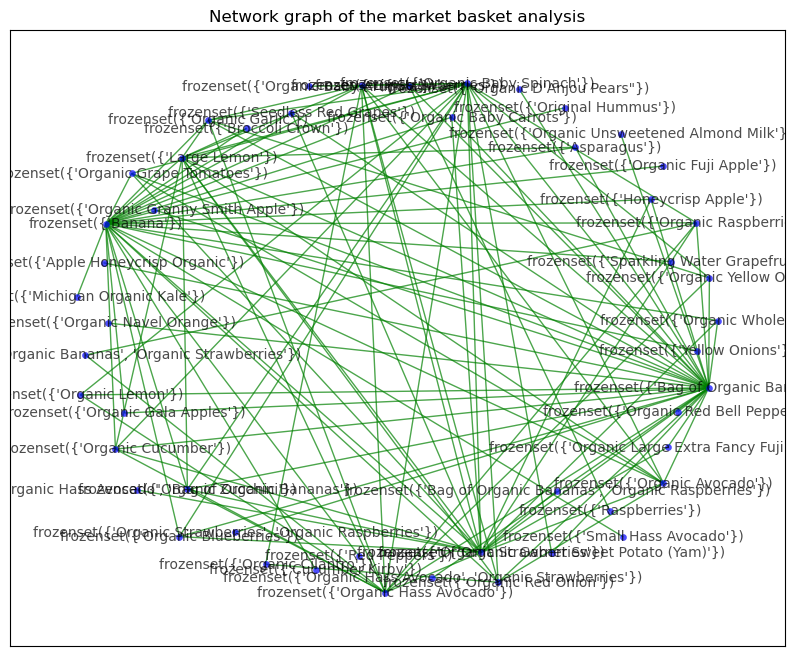

In [20]:
import networkx as nx
# Netwrok graph of the market basket analysis
import matplotlib.pyplot as plt

# Create a new graph from the DataFrame
G = nx.from_pandas_edgelist(rules, 'antecedents', 'consequents', ['support', 'confidence', 'lift'])

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=16, seed=37) # k regulates the distance between nodes
nx.draw_networkx(G, pos, node_size=20, node_color='blue', font_size=10, edge_color='green', linewidths=0.25, font_color='black', alpha=0.7, with_labels=True, edge_cmap=plt.cm.Blues)

plt.title('Network graph of the market basket analysis')
plt.show()

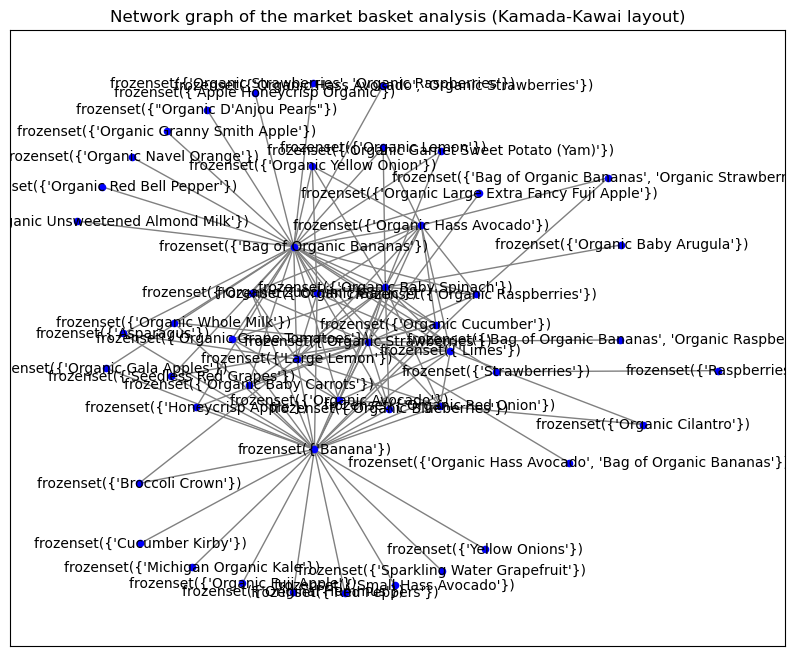

In [21]:
# Kamada-Kawaii layout
# Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw_networkx(G, pos, node_size=20, node_color='blue', font_size=10, edge_color='grey')

plt.title('Network graph of the market basket analysis (Kamada-Kawai layout)')
plt.show()